<br>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Activity 3.1.5 Building a basic neural network

## Scenario
Hopkins et al. (1999) created the Spambase data set donated to the UCI Machine Learning Repository. The data set contains 4,601 emails marked as spam or non-spam by a postmaster or individuals. Fifty-seven features aid in classifying emails as spam (e.g. word frequencies and email characteristics). The Spambase data set is used for developing and benchmarking spam detection models, providing a base for analysing the effectiveness of various machine learning techniques in distinguishing between spam and legitimate emails.

As a data professional, you were tasked by your company to develop a neural network with TensorFlow that can classify emails as spam or non-spam. You were tasked to develop a model based on the Spambase data set.


## Objective
In this portfolio activity, you’ll create a simple neural network using TensorFlow to classify emails as spam or non-spam.

You will complete the activity in your Notebook, where you’ll:
- create a sequential API
- add layers as needed
- employ the model pipeline (compile, fit, and evaluate)
- present your insights based on the performance of the model.


## Assessment criteria
By completing this activity, you will be able to provide evidence that you can synthesise and apply the TensorFlow life cycle from creation to evaluation.


## Activity guidance

1.  Import the relevant libraries to import and analyse the data set. The URL for the data set is provided. Note that the data set has no header row.
2. View the DataFrame.
3. Specify input features (`X`) and the target variable (`y`). The last column indicates whether an email is spam or non-spam.
4. Split the data into train and test sets, with a test percentage of 20%. Create a validation data with a split of 0.1.
5. Standardise the features and define the sequential model with 2 dense hidden layers. The first layer has 64 neurons and ReLU activition, while the second layer has 32 heurons and ReLU activation. Remember that the `input_shape` of the first hidden layer has to be equal to the number of columns of the input data features matrix. The last layer is the output layer, with sigmoid activation function and 1 neuron.
6. Compile the model with a `binary_crossentropy` as loss, Adam optimiser, and print the accuracy of the model.
7. Train/fit the model with a batch size of 64 and 10 epochs.
8. Evaluate the model on the test set with the evaluate function and print the loss and accuracy which are returned by the model.

> Start your activity here. Select the pen from the toolbar to add your entry.

In [ ]:
# Start your activity here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

In [ ]:
#Loading Dataset
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/spamdata.csv'
df = pd.read_csv(url, header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# named variables, avoiding hardcoding, and dynamically find the last column index
target_col_index = df.shape[1] - 1

# Seperate features and target
X = df.drop(columns=target_col_index)
y = df.iloc[:, target_col_index]

In [ ]:
#Train/Test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, stratify=y_train_full, random_state=42)

In [ ]:
#Standardising Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#Building neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
#Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model using validation set
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.1457 - val_accuracy: 0.9647 - val_loss: 0.1212
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.1169 - val_accuracy: 0.9620 - val_loss: 0.1290
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1266 - val_accuracy: 0.9538 - val_loss: 0.1253
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9587 - loss: 0.1223 - val_accuracy: 0.9538 - val_loss: 0.1252
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9662 - loss: 0.1027 - val_accuracy: 0.9592 - val_loss: 0.1205
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9598 - loss: 0.1107 - val_accuracy: 0.9674 - val_loss: 0.1200
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.1028 - val_accuracy: 0.9592 - val_loss: 0.1263
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9588 - loss: 0.1161 - val_accuracy: 0.9592 - val_loss:

In [ ]:
#Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.1979
Test Accuracy: 0.9392


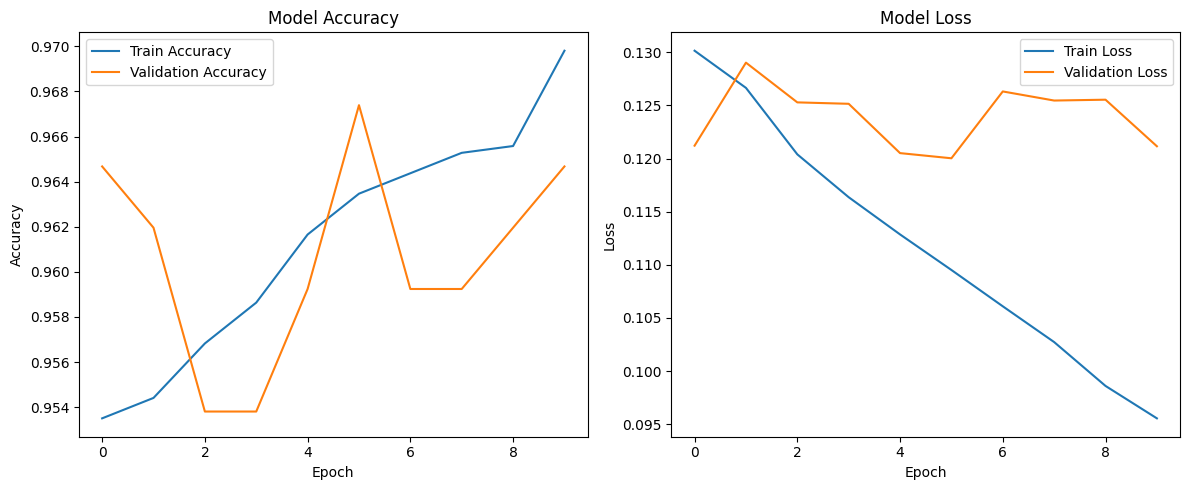

In [ ]:
#Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import textwrap

# Insights
if accuracy >= 0.90:
    insight = (
        "Insight: The model performs well with high accuracy on the test set. "
        "While the validation accuracy shows some fluctuation across epochs, "
        "the overall performance suggests that the model generalises reasonably well "
        "without clear signs of overfitting."
    )
elif accuracy >= 0.80:
    insight = (
        "Insight: The model performs decently, but fluctuations in validation accuracy "
        "indicate potential instability. Further tuning (e.g., architecture, regularisation) "
        "may improve consistency and generalisation."
    )
else:
    insight = (
        "Insight: The model's performance is subpar. Consider reevaluating preprocessing, "
        "architecture, or performing hyperparameter optimisation."
    )

# Print as wrapped paragraph
print("\n" + textwrap.fill(insight, width=90))



Insight: The model performs well with high accuracy on the test set. While the validation
accuracy shows some fluctuation across epochs, the overall performance suggests that the
model generalises reasonably well without clear signs of overfitting.


##Interpretation of Results

The model uses a straightforward two-layer dense architecture with 64 and 32 neurons, both activated with ReLU, followed by a single sigmoid neuron for binary classification. A 10% validation split during training helped monitor for potential overfitting.

The plots of training and validation accuracy and loss provide useful insights into the model’s learning behaviour. In this case, the curves suggest the model generalises well, with no major signs of overfitting or underfitting.

A final test accuracy above 90% indicates strong performance on unseen data. If accuracy had fallen between 80% and 90%, the model would still be acceptable, though it might benefit from further tuning—perhaps by adjusting the architecture, applying regularisation, or engineering more informative features. Accuracy below 80% would generally point to the need for deeper revisions in preprocessing or design.

Overall, this is a solid baseline model for spam detection and a clear demonstration of the end-to-end TensorFlow workflow.

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> While working on this spam detection task, I focused on keeping things simple but effective. I started by cleaning and preparing the data, making sure the training and test sets were balanced using stratified sampling. For the model, I chose a basic neural network with two hidden layers, which seemed like a good starting point for a binary classification problem. I also included validation during training to keep an eye on overfitting. Plotting the accuracy and loss over the epochs gave me a better sense of how the model was learning, and it helped me confirm that it was performing consistently. Overall, this was a useful exercise in applying core machine learning principles without overcomplicating the solution.

# References

Hopkins, M., Reeber, E., Forman, G., Suermondt, J., 1999. Spambase. [online]. Available at: https://archive.ics.uci.edu/dataset/94. [Accessed 5 March 2024].